In [1]:
import pandas as pd 
import numpy as np
import sys
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("C:/Users/138577/Desktop/Preds/all_sales_final.csv")

In [4]:
df = df.loc[df['sales_channel'] == "RETAIL"]

In [5]:
df.head()

,sdate,sales_channel,ordercount,product_release,holiday
39,2017-05-15,RETAIL,1,0,0
42,2017-05-16,RETAIL,5,0,0
44,2017-05-17,RETAIL,3,0,0
45,2017-05-18,RETAIL,7,0,0
47,2017-05-19,RETAIL,6,0,0


In [6]:
df.drop(df.head(1).index, inplace=True)

In [7]:
len(df)

743

In [8]:
df.head()

,sdate,sales_channel,ordercount,product_release,holiday
42,2017-05-16,RETAIL,5,0,0
44,2017-05-17,RETAIL,3,0,0
45,2017-05-18,RETAIL,7,0,0
47,2017-05-19,RETAIL,6,0,0
50,2017-05-20,RETAIL,7,0,0


In [10]:
train=df[0:len(df)] 
test=df[713:]

In [11]:
test.head(6)

,sdate,sales_channel,ordercount,product_release,holiday
1798,2019-04-29,RETAIL,1703,0,0
1805,2019-04-30,RETAIL,1735,0,0
1808,2019-05-01,RETAIL,1773,0,0
1812,2019-05-02,RETAIL,1669,0,0
1817,2019-05-03,RETAIL,2092,0,0
1820,2019-05-04,RETAIL,2538,0,0


In [12]:
test.tail()

,sdate,sales_channel,ordercount,product_release,holiday
1900,2019-05-24,RETAIL,2433,0,0
1905,2019-05-25,RETAIL,2677,0,0
1909,2019-05-26,RETAIL,1364,0,0
1913,2019-05-27,RETAIL,1608,0,0
1914,2019-05-28,RETAIL,1592,0,0


In [13]:
df.Timestamp = pd.to_datetime(df.sdate,format='%Y-%m-%d') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.sdate,format='%Y-%m-%d') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.sdate,format='%Y-%m-%d') 
test.index = test.Timestamp 
test = test.resample('D').mean()

C:\Users\138577\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\138577\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
C:\Users\138577\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


In [14]:
nan_rows = df[df['ordercount'].isnull()]
nan_rows

,ordercount,product_release,holiday
sdate,,,


In [15]:
df.head()

,ordercount,product_release,holiday
sdate,,,
2017-05-16,5,0,0
2017-05-17,3,0,0
2017-05-18,7,0,0
2017-05-19,6,0,0
2017-05-20,7,0,0


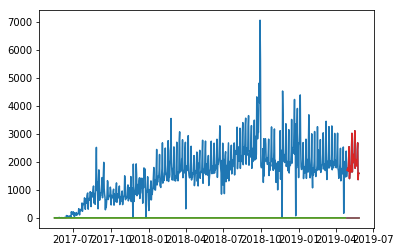

In [16]:
%matplotlib inline
plt.plot(train)
plt.plot(test);

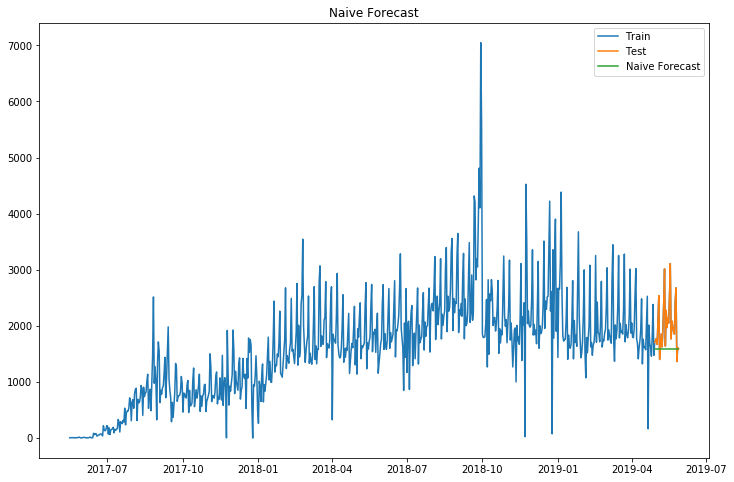

In [17]:
dd= np.asarray(train.ordercount)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['ordercount'], label='Train')
plt.plot(test.index,test['ordercount'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show();

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.ordercount, y_hat.naive))
print(rms)

604.113124064249


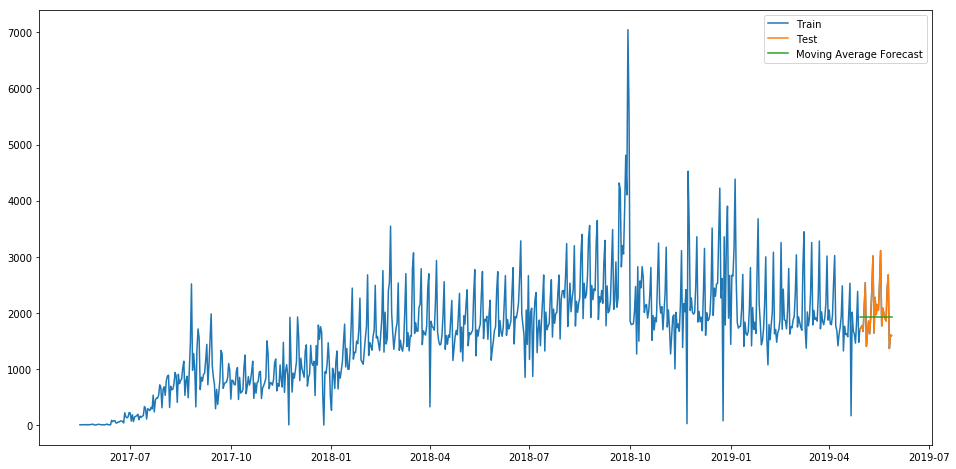

In [19]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['ordercount'].rolling(7).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['ordercount'], label='Train')
plt.plot(test['ordercount'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

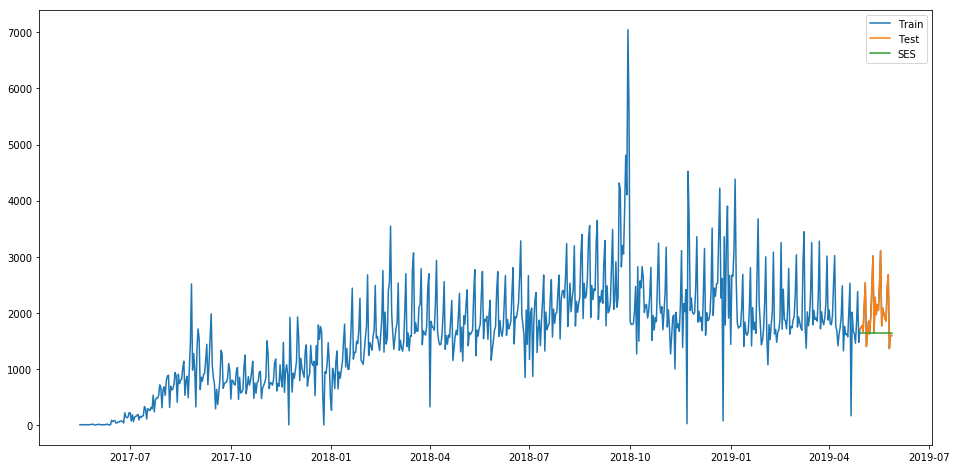

In [20]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['ordercount'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['ordercount'], label='Train')
plt.plot(test['ordercount'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [21]:
train.ordercount.head()

sdate
2017-05-16    5
2017-05-17    3
2017-05-18    7
2017-05-19    6
2017-05-20    7
Freq: D, Name: ordercount, dtype: int64

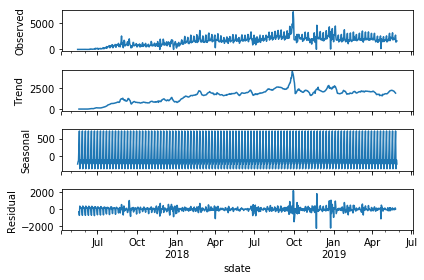

<Figure size 1152x576 with 0 Axes>

In [22]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.ordercount).plot()
result = sm.tsa.stattools.adfuller(train.ordercount)
plt.figure(figsize=(16,8))
plt.show()

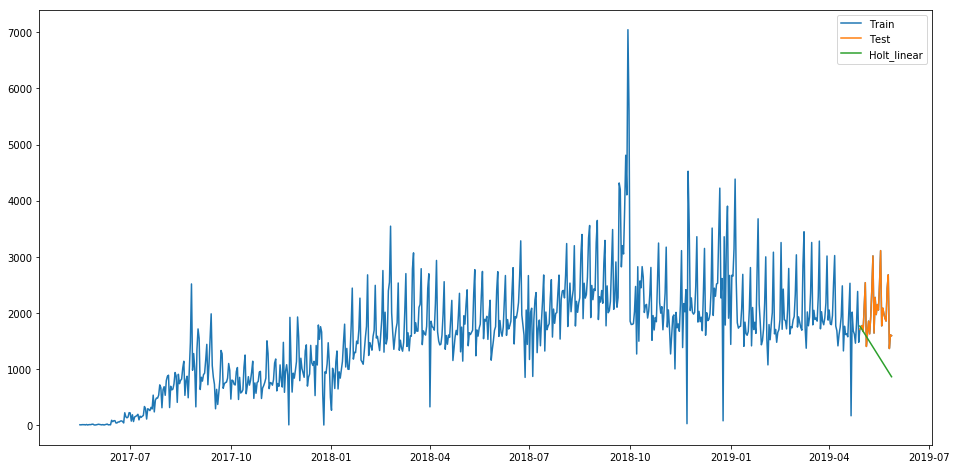

In [23]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['ordercount'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['ordercount'], label='Train')
plt.plot(test['ordercount'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

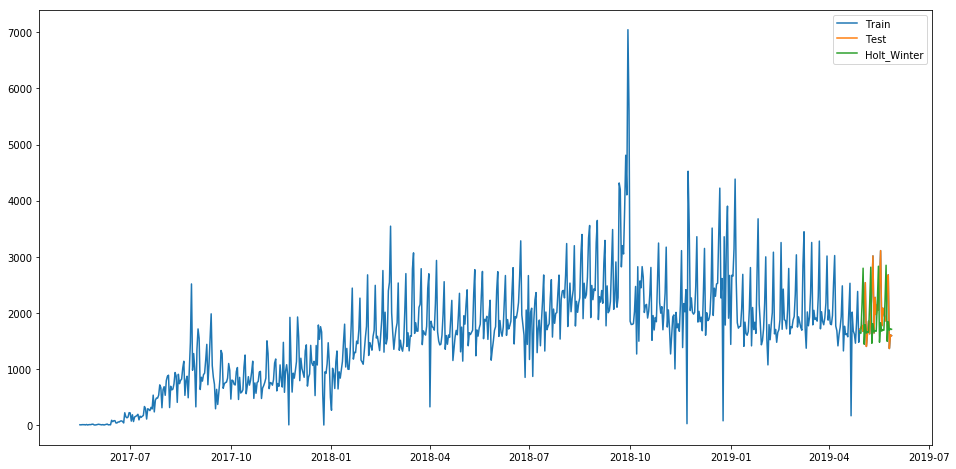

In [24]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['ordercount']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['ordercount'], label='Train')
plt.plot(test['ordercount'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

C:\Users\138577\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


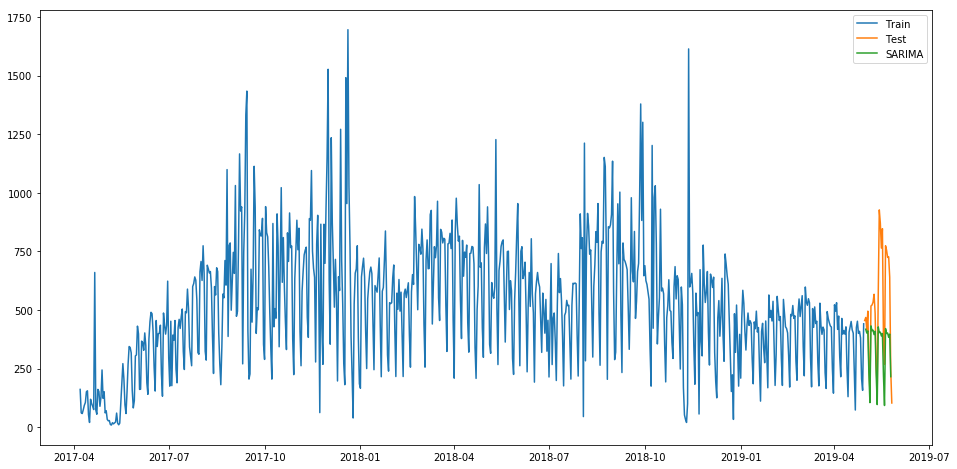

In [68]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.ordercount, order=(2, 1, 1),seasonal_order=(1,1,2,7), trend= "n", mle_regression = False, enforce_invertibility = False, measurement_error = False).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2019-05-01", end="2019-05-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['ordercount'], label='Train')
plt.plot(test['ordercount'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [25]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(train['ordercount'], start_p=1, start_q=1,
                           max_p=7, max_q=7, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=10861.576, BIC=10884.575, Fit time=3.966 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=11515.030, BIC=11524.230, Fit time=0.121 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=11147.814, BIC=11166.214, Fit time=1.442 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=10865.280, BIC=10883.679, Fit time=2.551 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=10863.575, BIC=10891.174, Fit time=5.935 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=11293.970, BIC=11312.370, Fit time=0.379 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=10863.575, BIC=10891.174, Fit time=7.135 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=10865.085, BIC=10897.285, Fit time=10.278 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=10841.723, BIC=10869.322, Fit time=4.707 seconds
Fit ARIMA: order=(

In [26]:
stepwise_model.fit(train['ordercount'])

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(3, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 1, 7), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [27]:
future_forecast = stepwise_model.predict(n_periods=30)

In [28]:
import datetime
from dateutil.relativedelta import *
import calendar
maxd = (str(df.index.max() + pd.to_timedelta(1, unit='D'))[:10])
start = datetime.datetime.strptime(maxd, "%Y-%m-%d")
date_list = [start + relativedelta(days=x) for x in range(30)]
future = pd.DataFrame(index=date_list, columns= df.columns)

In [29]:
future['predictedvalue'] = future_forecast

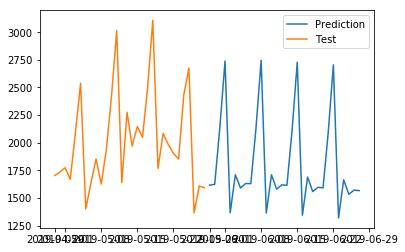

In [30]:
plt.plot(future.predictedvalue, label='Prediction')
plt.plot(test['ordercount'], label='Test')
plt.legend(loc='best')
plt.show()